In [ ]:
import pandas as pd
import json

with open("./odis_json_file.json", "r") as file:
    data = json.load(file)

all_rows = []

# Loop through the data structure
for match in data:  # Iterate over all matches
    # Extract match-level data
    match_event = match.get("info", {}).get("event", {}).get("name", None)
    match_outcome = match.get("info", {}).get("outcome", {})
    match_winner = match_outcome.get("winner", None)
    player_of_match = ", ".join(match.get("info", {}).get("player_of_match", []))
    match_season = match.get("info", {}).get("season", None)
    toss_decision = match.get("info", {}).get("toss", {}).get("decision", None)
    toss_winner = match.get("info", {}).get("toss", {}).get("winner", None)
    venue = match.get("info", {}).get("venue", None)
    
    # Extract innings and deliveries data
    innings = match.get("innings", [])  # Get the innings list
    
    for inning in innings:  # Iterate over each inning
        team_name = inning.get("team")  # Extract team name
        overs = inning.get("overs", [])  # Get overs for the team
        
        for over_data in overs:  # Iterate through each over
            over_number = over_data.get("over")  # Extract the over number
            deliveries = over_data.get("deliveries", [])  # Extract deliveries
            
            for delivery in deliveries:  # Flatten each delivery
                # Check for wickets and extract `player_out` if present
                player_out = "None"  # Default value if no wickets are present
                if "wickets" in delivery:
                    wickets = delivery.get("wickets", [])
                    # Extract player_out for each wicket
                    player_outs = [wicket.get("player_out", "None") for wicket in wickets]
                    player_out = ", ".join(player_outs) if player_outs else "None"
                
                # Add all data into the row
                row = {
                    "Match Event": match_event,
                    "Match Winner": match_winner,
                    "Player of Match": player_of_match,
                    "Season": match_season,
                    "Toss Decision": toss_decision,
                    "Toss Winner": toss_winner,
                    "Venue": venue,
                    "Team": team_name,
                    "Over": over_number,
                    "Batter": delivery.get("batter"),
                    "Bowler": delivery.get("bowler"),
                    "Non-Striker": delivery.get("non_striker"),
                    "Batter Runs": delivery["runs"].get("batter", 0),
                    "Extras Runs": delivery["runs"].get("extras", 0),
                    "Total Runs": delivery["runs"].get("total", 0),
                    "Player Out": player_out  # Add player_out to the row
                }
                all_rows.append(row)

# Create a DataFrame from the collected rows
df = pd.DataFrame(all_rows)

# Save the DataFrame to a CSV file
df.to_csv("ODI_data.csv", index=False)

# Display the DataFrame
print(df)


In [1]:
import pandas as pd

# Specify the dtype for column 3 (1-based index)
Test_data = pd.read_csv("ODI_data.csv", dtype={3: str})  # Treat column 3 as string

# Display the data to check
print(Test_data.head())


                             Match Event Match Winner Player of Match  \
0  West Indies in New Zealand ODI Series  New Zealand      DL Vettori   
1  West Indies in New Zealand ODI Series  New Zealand      DL Vettori   
2  West Indies in New Zealand ODI Series  New Zealand      DL Vettori   
3  West Indies in New Zealand ODI Series  New Zealand      DL Vettori   
4  West Indies in New Zealand ODI Series  New Zealand      DL Vettori   

    Season Toss Decision  Toss Winner            Venue         Team  Over  \
0  2008/09         field  New Zealand  Westpac Stadium  West Indies     0   
1  2008/09         field  New Zealand  Westpac Stadium  West Indies     0   
2  2008/09         field  New Zealand  Westpac Stadium  West Indies     0   
3  2008/09         field  New Zealand  Westpac Stadium  West Indies     0   
4  2008/09         field  New Zealand  Westpac Stadium  West Indies     0   

        Batter    Bowler  Non-Striker  Batter Runs  Extras Runs  Total Runs  \
0     CH Gayle  KD 

In [2]:
Test_data = Test_data.rename(columns={
    'Match Event' : 'Match_Event',
    'Match Winner' : 'Match_Winner',
    'Player of Match' : 'Player_of_Match',
    'Toss Decision' : 'Toss_Decision',
    'Toss Winner' : 'Toss_Winner',
    'Non-Striker' : 'Non_Striker',
    'Batter Runs' : 'Batter_Runs',
    'Extras Runs' : 'Extras_Runs',
    'Total Runs' : 'Total_Runs',
    'Player Out' : 'Player_Out'
})

In [3]:
Test_data.drop_duplicates().head()

,Match_Event,Match_Winner,Player_of_Match,Season,Toss_Decision,Toss_Winner,Venue,Team,Over,Batter,Bowler,Non_Striker,Batter_Runs,Extras_Runs,Total_Runs,Player_Out
0,West Indies in New Zealand ODI Series,New Zealand,DL Vettori,2008/09,field,New Zealand,Westpac Stadium,West Indies,0,CH Gayle,KD Mills,XM Marshall,1,0,1,NaN
1,West Indies in New Zealand ODI Series,New Zealand,DL Vettori,2008/09,field,New Zealand,Westpac Stadium,West Indies,0,XM Marshall,KD Mills,CH Gayle,0,0,0,NaN
3,West Indies in New Zealand ODI Series,New Zealand,DL Vettori,2008/09,field,New Zealand,Westpac Stadium,West Indies,0,XM Marshall,KD Mills,CH Gayle,0,0,0,XM Marshall
4,West Indies in New Zealand ODI Series,New Zealand,DL Vettori,2008/09,field,New Zealand,Westpac Stadium,West Indies,0,RR Sarwan,KD Mills,CH Gayle,0,0,0,NaN
6,West Indies in New Zealand ODI Series,New Zealand,DL Vettori,2008/09,field,New Zealand,Westpac Stadium,West Indies,1,CH Gayle,TG Southee,RR Sarwan,4,0,4,NaN


In [4]:
Test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1513804 entries, 0 to 1513803
Data columns (total 16 columns):
 #   Column           Non-Null Count    Dtype 
---  ------           --------------    ----- 
 0   Match_Event      1508008 non-null  object
 1   Match_Winner     1471567 non-null  object
 2   Player_of_Match  1437869 non-null  object
 3   Season           1513804 non-null  object
 4   Toss_Decision    1513804 non-null  object
 5   Toss_Winner      1513804 non-null  object
 6   Venue            1513804 non-null  object
 7   Team             1513804 non-null  object
 8   Over             1513804 non-null  int64 
 9   Batter           1513804 non-null  object
 10  Bowler           1513804 non-null  object
 11  Non_Striker      1513804 non-null  object
 12  Batter_Runs      1513804 non-null  int64 
 13  Extras_Runs      1513804 non-null  int64 
 14  Total_Runs       1513804 non-null  int64 
 15  Player_Out       41294 non-null    object
dtypes: int64(4), object(12)
memory usage

In [5]:
# Group by 'Team' and 'Batter', then sum the 'Batter Runs'
player_runs_by_team = Test_data.groupby(["Team", "Batter"])["Batter_Runs"].sum().reset_index()

# Rename the columns for better readability
player_runs_by_team.columns = ["Team", "Player", "Total_Runs"]

# Display the resulting DataFrame
print(player_runs_by_team)

           Team          Player  Total_Runs
0     Africa XI  AB de Villiers         111
1     Africa XI       AG Prince          78
2     Africa XI        DW Steyn           4
3     Africa XI    E Chigumbura          51
4     Africa XI        GC Smith           0
...         ...             ...         ...
2414   Zimbabwe       V Sibanda        2045
2415   Zimbabwe      VM Nyauchi          43
2416   Zimbabwe     W Madhevere         674
2417   Zimbabwe      W Mwayenga           1
2418   Zimbabwe    WP Masakadza         204

[2419 rows x 3 columns]


In [7]:
Test_data["Season"].value_counts().head()

Season
2006/07    70344
2023/24    61365
2014/15    59062
2023       56686
2022       55178
Name: count, dtype: int64

In [8]:
# Filter the data for the season 2016/17
season_data = Test_data[Test_data["Season"] == "2022/23"]

# Group by 'Team' and 'Batter', then sum the 'Batter Runs'
player_runs_by_team = (
    season_data.groupby(["Season","Team", "Batter"])["Batter_Runs"]
    .sum()
    .reset_index()
)

# Sort by 'Batter Runs' in descending order to find the top batsmen
top_batsmen = player_runs_by_team.sort_values(by="Batter_Runs", ascending=False).head(10)

# Rename the columns for better readability
top_batsmen.columns = ["Season","Team", "Player", "Total_Runs"]

# Display the resulting DataFrame
print(top_batsmen)


      Season          Team        Player  Total_Runs
111  2022/23         India  Shubman Gill         812
113  2022/23         India       V Kohli         554
108  2022/23         India       SS Iyer         523
157  2022/23         Nepal  Aasif Sheikh         515
149  2022/23       Namibia  M van Lingen         477
168  2022/23         Nepal     RK Paudel         474
150  2022/23       Namibia    MG Erasmus         453
62   2022/23       England      DJ Malan         450
102  2022/23         India     RG Sharma         449
283  2022/23  South Africa    AK Markram         440


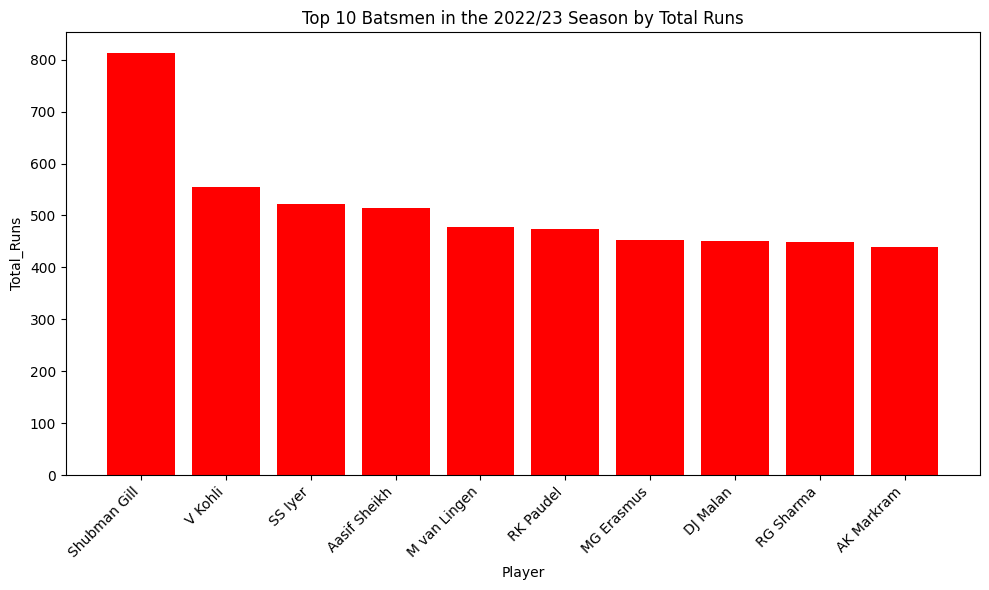

In [9]:
import matplotlib.pyplot as plt

# Plotting the bar chart
plt.figure(figsize=(10, 6))
plt.bar(top_batsmen["Player"], top_batsmen["Total_Runs"], color='red')

# Adding labels and title
plt.xlabel("Player")
plt.ylabel("Total_Runs")
plt.title("Top 10 Batsmen in the 2022/23 Season by Total Runs")
plt.xticks(rotation=45, ha='right')

# Display the plot
plt.tight_layout()
plt.show()


In [10]:
missing_values = Test_data.isnull()
print(missing_values)

         Match_Event  Match_Winner  Player_of_Match  Season  Toss_Decision  \
0              False         False            False   False          False   
1              False         False            False   False          False   
2              False         False            False   False          False   
3              False         False            False   False          False   
4              False         False            False   False          False   
...              ...           ...              ...     ...            ...   
1513799        False         False            False   False          False   
1513800        False         False            False   False          False   
1513801        False         False            False   False          False   
1513802        False         False            False   False          False   
1513803        False         False            False   False          False   

         Toss_Winner  Venue   Team   Over  Batter  Bowler  Non_

In [11]:
has_missing_values = Test_data.isnull().values.any()       # Now there is no missing or null value
print(has_missing_values)

True


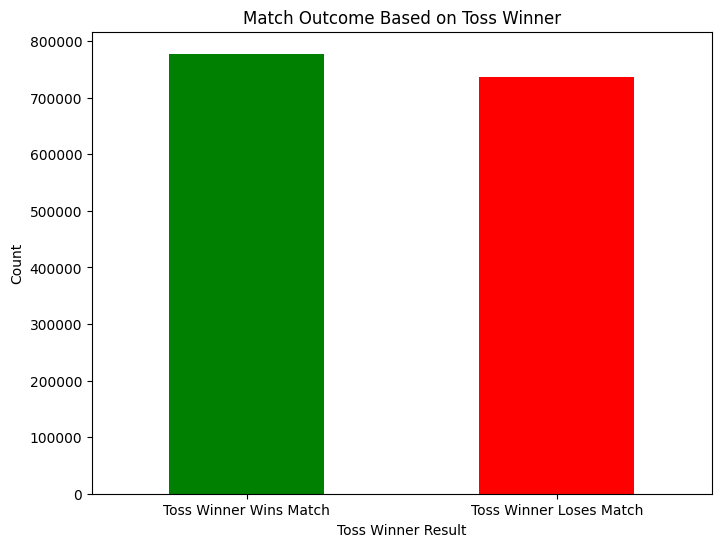

In [12]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming the data is loaded into Test_data
# Create a new column to indicate if the toss winner is also the match winner
Test_data['Toss_Match_Winner'] = Test_data['Toss_Winner'] == Test_data['Match_Winner']

# Plotting the comparison
toss_match_winner_counts = Test_data['Toss_Match_Winner'].value_counts()

# Bar chart to show the number of times toss winner wins or loses the match
plt.figure(figsize=(8, 6))
toss_match_winner_counts.plot(kind='bar', color=['green', 'red'])
plt.title('Match Outcome Based on Toss Winner')
plt.xlabel('Toss Winner Result')
plt.ylabel('Count')
plt.xticks([0, 1], ['Toss Winner Wins Match', 'Toss Winner Loses Match'], rotation=0)
plt.show()

      Season          Team         Player  Total_Runs
411  2023/24     Australia      DA Warner         884
111  2022/23         India   Shubman Gill         812
419  2023/24     Australia  M Labuschagne         795
554  2023/24         India        V Kohli         766
759  2023/24  South Africa      Q de Kock         763
750  2023/24  South Africa    L Wolvaardt         725
113  2022/23         India        V Kohli         554
108  2022/23         India        SS Iyer         523
157  2022/23         Nepal   Aasif Sheikh         515
149  2022/23       Namibia   M van Lingen         477


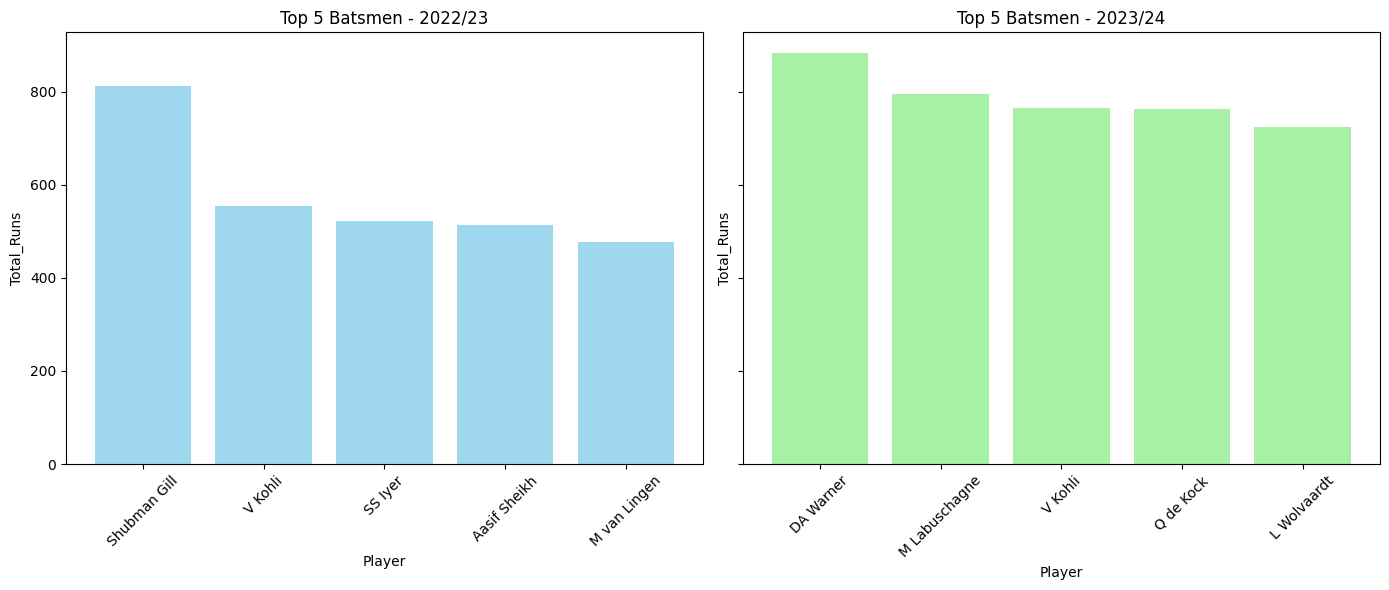

In [13]:
import pandas as pd
import matplotlib.pyplot as plt

# Filter the data for the seasons 2022/23 and 2023/24
seasons_data = Test_data[Test_data["Season"].isin(["2022/23", "2023/24"])]

# Group by 'Season', 'Team', and 'Batter', then sum the 'Batter Runs'
player_runs_by_season = (
    seasons_data.groupby(["Season", "Team", "Batter"])["Batter_Runs"]
    .sum()
    .reset_index()
)

# Sort by 'Batter Runs' in descending order to find the top batsmen for each season
top_batsmen = (
    player_runs_by_season.sort_values(by="Batter_Runs", ascending=False)
    .groupby("Season")
    .head(5)
)

# Rename the columns for better readability
top_batsmen.columns = ["Season", "Team", "Player", "Total_Runs"]

# Display the resulting DataFrame
print(top_batsmen)

# Define colors for each season
colors = {
    "2022/23": "skyblue",
    "2023/24": "lightgreen",
}

# Create separate plots for each season
seasons = ["2022/23", "2023/24"]
fig, axes = plt.subplots(1, len(seasons), figsize=(14, 6), sharey=True)

for ax, season in zip(axes, seasons):
    season_data = top_batsmen[top_batsmen["Season"] == season]
    ax.bar(
        season_data["Player"],
        season_data["Total_Runs"],
        color=colors[season],
        alpha=0.8,
    )
    ax.set_title(f"Top 5 Batsmen - {season}")
    ax.set_xlabel("Player")
    ax.set_ylabel("Total_Runs")
    ax.set_xticks(range(len(season_data["Player"])))
    ax.set_xticklabels(season_data["Player"], rotation=45)

# Adjust layout
plt.tight_layout()

# Show the plot
plt.show()


Top 5 bowlers in the 2022/23 season with the most wickets:
Bowler
R Trumpelmann     32
S Lamichhane      31
Mohammed Siraj    31
T Lungameni       27
DS Airee          23
Name: count, dtype: int64


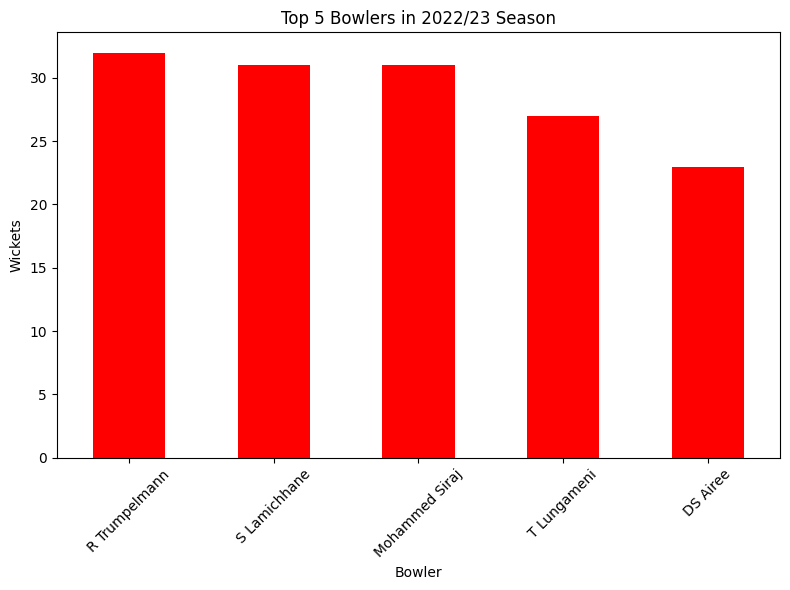

In [14]:
import pandas as pd

# Filter data for the 2016/17 season
season_data = Test_data[Test_data["Season"] == "2022/23"]

# Filter rows where "Bowler" has a value and "Player Out" is not NaN
valid_wickets = season_data[season_data["Player_Out"].notna()]

# Count the number of times each bowler appears in valid rows
bowler_wickets = valid_wickets["Bowler"].value_counts()

# Get the top 5 bowlers
top_5_bowlers = bowler_wickets.head(5)

print("Top 5 bowlers in the 2022/23 season with the most wickets:")
print(top_5_bowlers)

# Plot the top 5 bowlers
top_5_bowlers.plot(kind='bar', figsize=(8, 6), color='Red')
plt.title("Top 5 Bowlers in 2022/23 Season")
plt.xlabel("Bowler")
plt.ylabel("Wickets")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


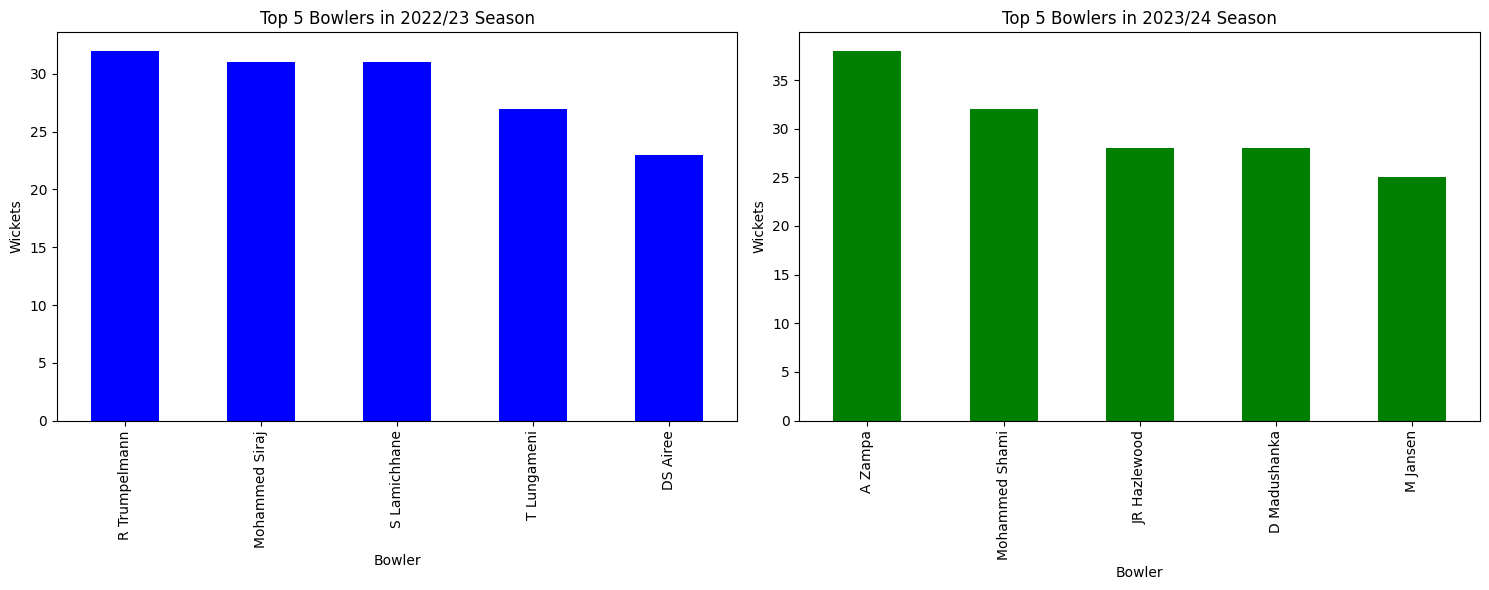

In [15]:
import pandas as pd
import matplotlib.pyplot as plt

# Filter data for 2016/17 and 2018/19 seasons
season_2022_23 = Test_data[Test_data['Season'] == '2022/23']
season_2023_24 = Test_data[Test_data['Season'] == '2023/24']

# Function to find top 5 bowlers based on highest wickets
def top_bowlers(season_data):
    # Filter rows where the bowler has taken a wicket
    wickets_data = season_data.dropna(subset=['Player_Out', 'Bowler'])
    
    # Count wickets taken by each bowler
    bowler_wickets = wickets_data.groupby('Bowler').size().sort_values(ascending=False).head(5)
    
    return bowler_wickets

# Get the top 5 bowlers for both seasons
top_bowlers_2022_23 = top_bowlers(season_2022_23)
top_bowlers_2023_24 = top_bowlers(season_2023_24)

# Create subplots to show the graphs side by side
fig, axes = plt.subplots(1, 2, figsize=(15, 6))

# Plot for 2016/17 season
top_bowlers_2022_23.plot(kind='bar', ax=axes[0], color='blue', title='Top 5 Bowlers in 2022/23 Season')
axes[0].set_xlabel('Bowler')
axes[0].set_ylabel('Wickets')

# Plot for 2018/19 season
top_bowlers_2023_24.plot(kind='bar', ax=axes[1], color='green', title='Top 5 Bowlers in 2023/24 Season')
axes[1].set_xlabel('Bowler')
axes[1].set_ylabel('Wickets')

# Show the plots
plt.tight_layout()
plt.show()


In [20]:
Test_data.isnull().sum()

Match_Event          0
Match_Winner         0
Player_of_Match      0
Season               0
Toss_Decision        0
Toss_Winner          0
Venue                0
Team                 0
Over                 0
Batter               0
Bowler               0
Non_Striker          0
Batter_Runs          0
Extras_Runs          0
Total_Runs           0
Player_Out           0
Toss_Match_Winner    0
dtype: int64

In [16]:
# Replace None or NaN values in 'Player Out' column with 0
Test_data['Player_Out'] = Test_data['Player_Out'].fillna(0)

# Verify the replacement
print(Test_data['Player_Out'].head())

0              0
1              0
2              0
3    XM Marshall
4              0
Name: Player_Out, dtype: object


In [17]:
# Replace None or NaN values in 'Player of Match' column with 0
Test_data['Player_of_Match'] = Test_data['Player_of_Match'].fillna(0)

# Verify the replacement
print(Test_data['Player_of_Match'].head())

0    DL Vettori
1    DL Vettori
2    DL Vettori
3    DL Vettori
4    DL Vettori
Name: Player_of_Match, dtype: object


In [18]:
# Replace None or NaN values in 'Match Event' column with 0
Test_data['Match_Event'] = Test_data['Match_Event'].fillna(0)

# Verify the replacement
print(Test_data['Match_Event'].head())

0    West Indies in New Zealand ODI Series
1    West Indies in New Zealand ODI Series
2    West Indies in New Zealand ODI Series
3    West Indies in New Zealand ODI Series
4    West Indies in New Zealand ODI Series
Name: Match_Event, dtype: object


In [19]:
# Replace None or NaN values in 'Match Winner' column with 0
Test_data['Match_Winner'] = Test_data['Match_Winner'].fillna(0)

# Verify the replacement
print(Test_data['Match_Winner'].head())

0    New Zealand
1    New Zealand
2    New Zealand
3    New Zealand
4    New Zealand
Name: Match_Winner, dtype: object


In [21]:
Test_data.to_csv("ODI_data_final.csv", index=False)